#Neural Networks & Deep Learning - ICP-3
Given code with rectified bugs

In [11]:
# Simple CNN model for CIFAR-10
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers.legacy import SGD
from keras.utils import to_categorical
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               4194816   
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/25
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7462 - accuracy: 0.3703 - val_loss: 1.4452 - val_accuracy: 0.4824
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4236 - accuracy: 0.4885 - val_loss: 1.3206 - val_accuracy: 0.5298
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2847 - accuracy: 0.5393 - val_loss: 1.1924 - val_accuracy: 0.5692
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1642 - accuracy: 0.5854 - val_loss: 1.1059 - val_accuracy: 0.6086
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0654 - accuracy: 0.6218 - val_loss: 1.0711 - val_accuracy: 0.6197
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9776 - accuracy: 0.6541 - val_loss: 1.0133 - val_accuracy: 0.6419
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9116 - accuracy: 0.6765 - val_loss: 0.9905 - val_a

**Note**: Accuracy of with initilal model is 70.47%.


1.	Follow the instruction below and then report how the performance changed.(apply all at once)
*	Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
*	Dropout layer at 20%.
*	Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
*	Max Pool layer with size 2×2.
*	Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
*	Dropout layer at 20%.
*	Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
*	Max Pool layer with size 2×2.
*	Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
*	Dropout layer at 20%.
*	Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
*	Max Pool layer with size 2×2.
*	Flatten layer.
*	Dropout layer at 20%.
*	Fully connected layer with 1024 units and a rectifier activation function.
*	Dropout layer at 20%.
*	Fully connected layer with 512 units and a rectifier activation function.
*	Dropout layer at 20%.
*	Fully connected output layer with 10 units and a Softmax activation function

Did the performance change?

2.	Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4 images to check whether or not the model has predicted correctly.
3.	Visualize Loss and Accuracy using the history object


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)        0         
                                                      

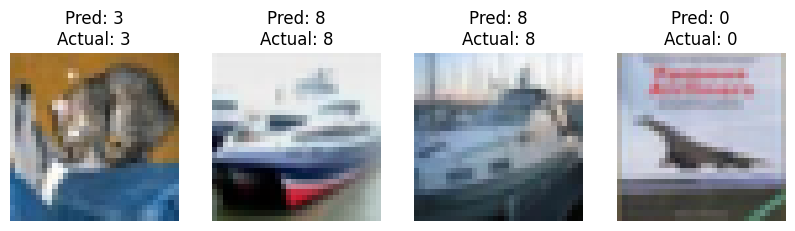

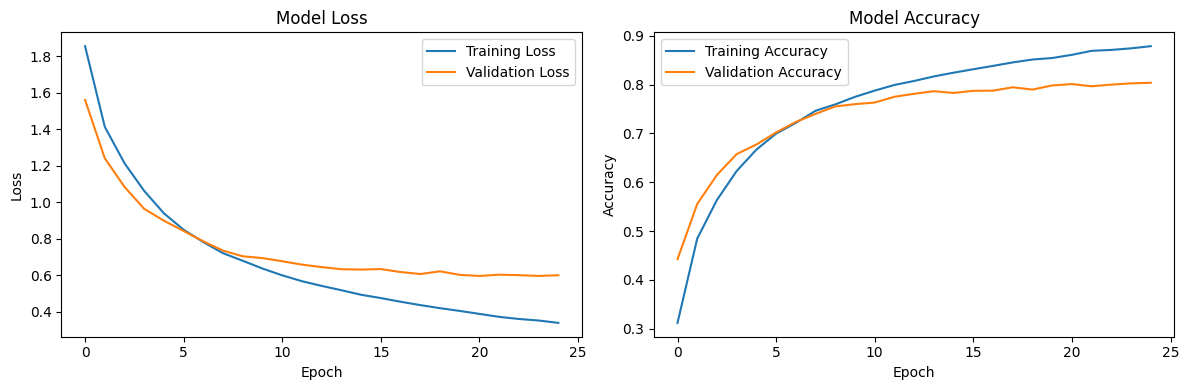

In [3]:
# Simple CNN model for CIFAR-10
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from keras.optimizers.legacy import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate / epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Predict the first 4 images
predictions = model.predict(X_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)
print("Predicted classes:", predicted_classes)
print("Actual classes:   ", actual_classes)

# Check if predictions are correct
correct_predictions = predicted_classes == actual_classes
print("Correct predictions:", correct_predictions)

fig, axes = plt.subplots(1, 4, figsize=(10, 2.5))
for i in range(4):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Pred: {predicted_classes[i]}\nActual: {actual_classes[i]}")
    axes[i].axis('off')
plt.show()


# Visualize Loss and Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Note**: Changing the model architecture has boosted model accuracy to 80.36%.

There can be more imporvemnt by trying different hyperperameters.